# Course Name: Computer Vision
# Project Name: Plant Seedlings Image Classification using CNNs in Keras

Submitted: Manasi Sipani

Date: 3/5/2022

## Problem Definition

The goal today is to help differentiate a weed from crop, so that we can have a better yield and better stewardship of our environment. In order to do that, I will begin with exploring and visualizing the images, preprocess the image data as needed and then build convolutional neural network classifier  capable  of  determining  a plant's species from a photo.

## Data Information

We are provided with a dataset  of  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique  id.  The  dataset  comprises  12  plant  species. 

The data file names are:
1. images.npy
1. Labels.csv

Due to the large volume of data, the images were converted to images.npy file and the labels are provided in the Labels.csv file.

## Initialize and Preliminary Data Analysis
### Import All Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import scipy.stats as stats 

# Library to split data
from sklearn.model_selection import train_test_split


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction

from sklearn import metrics

# to scale the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# to encode the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# to compute distances
from scipy.spatial.distance import cdist

# to build neural networks
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import cv2 # For Guassian blurring
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import f1_score 

random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
from pandas_profiling import ProfileReport

# Printing style
from tabulate import tabulate

# Load dataset and Summary

### Read the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Label = pd.read_csv('/content/drive/MyDrive/Labels.csv')

In [4]:
Data = np.load('/content/drive/MyDrive/images.npy')

### Visualization of the image dataset

In [5]:
Data[1]

array([[[ 30,  47,  63],
        [ 30,  50,  60],
        [ 34,  47,  63],
        ...,
        [ 48,  59,  74],
        [ 42,  54,  69],
        [ 44,  56,  70]],

       [[ 30,  49,  67],
        [ 26,  47,  60],
        [ 30,  40,  61],
        ...,
        [ 50,  64,  76],
        [ 52,  67,  78],
        [ 45,  56,  72]],

       [[ 23,  46,  65],
        [ 27,  48,  64],
        [ 25,  40,  59],
        ...,
        [ 39,  59,  81],
        [ 47,  62,  79],
        [ 42,  54,  69]],

       ...,

       [[ 32,  54,  72],
        [ 58,  82,  95],
        [ 72,  96, 109],
        ...,
        [ 60,  80,  99],
        [ 50,  72,  92],
        [ 45,  64,  84]],

       [[ 31,  51,  67],
        [ 25,  50,  64],
        [ 38,  64,  80],
        ...,
        [ 63,  83, 101],
        [ 57,  78,  96],
        [ 50,  69,  89]],

       [[ 18,  32,  56],
        [ 16,  27,  50],
        [ 34,  49,  71],
        ...,
        [ 59,  84, 101],
        [ 55,  80,  97],
        [ 39,  59,  82]]

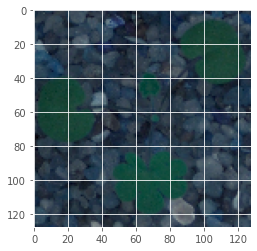

In [6]:
img=Data[1].reshape(128,128,3)
plt.imshow(img)

### Formatting image and label dataset

In [7]:
X = Data.reshape((4750, 128, 128, 3))
X.shape

(4750, 128, 128, 3)

In [8]:
#creating the dataframe for target classes
y = pd.DataFrame(Label)

In [9]:
y.head() # view top 5 rows

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [10]:
y.tail()

,Label
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent
4749,Loose Silky-bent


### Understand the shape of the dataset

In [11]:
X.shape

(4750, 128, 128, 3)

In [12]:
y.shape # view number of rows and columns
print(f'There are {y.shape[0]} rows and {y.shape[1]} columns.')  # f-string

There are 4750 rows and 1 columns.


### Check the data types of the columns for the dataset.

In [13]:
X[1]

array([[[ 30,  47,  63],
        [ 30,  50,  60],
        [ 34,  47,  63],
        ...,
        [ 48,  59,  74],
        [ 42,  54,  69],
        [ 44,  56,  70]],

       [[ 30,  49,  67],
        [ 26,  47,  60],
        [ 30,  40,  61],
        ...,
        [ 50,  64,  76],
        [ 52,  67,  78],
        [ 45,  56,  72]],

       [[ 23,  46,  65],
        [ 27,  48,  64],
        [ 25,  40,  59],
        ...,
        [ 39,  59,  81],
        [ 47,  62,  79],
        [ 42,  54,  69]],

       ...,

       [[ 32,  54,  72],
        [ 58,  82,  95],
        [ 72,  96, 109],
        ...,
        [ 60,  80,  99],
        [ 50,  72,  92],
        [ 45,  64,  84]],

       [[ 31,  51,  67],
        [ 25,  50,  64],
        [ 38,  64,  80],
        ...,
        [ 63,  83, 101],
        [ 57,  78,  96],
        [ 50,  69,  89]],

       [[ 18,  32,  56],
        [ 16,  27,  50],
        [ 34,  49,  71],
        ...,
        [ 59,  84, 101],
        [ 55,  80,  97],
        [ 39,  59,  82]]

In [14]:
y.info() # view info on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


**Observations:**
* There are no nulls in the data, so no null treatment is needed.
* We will learn the images to predict the labels.
* Label is our dependant variable.

### Summary of the dataset.

In [15]:
Label.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

* Dataset is not balanced, we may have to handle it later. 

In [16]:
Label.value_counts()/(Label.value_counts().sum())*100

Label                    
Loose Silky-bent            13.768
Common Chickweed            12.863
Scentless Mayweed           10.863
Small-flowered Cranesbill   10.442
Fat Hen                     10.000
Charlock                     8.211
Sugar beet                   8.105
Cleavers                     6.042
Black-grass                  5.537
Shepherds Purse              4.863
Common wheat                 4.653
Maize                        4.653
dtype: float64

In [17]:
y.describe(include='all')

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


**Observations:**   

* There are 12 classes in the target variable.
* Maximum data is from Loose Silky-bent plant.

### Further Image Visualization from each Class
Let's visualize seedling images randomly from each of the 12 classes. Since our data is RGB colored, each row represents three single channel images corresponding to one class. We will read single channel images in order to reduce complexity.

In [18]:
Data.shape

(4750, 128, 128, 3)

In [19]:
Data = Data.astype('float32') / 255

In [20]:
images = np.array(Data)
label = np.array(Label)
index = Label.index
df = pd.DataFrame({'label': list(label), 'images': list(images)}, columns=['label', 'images'], index=index)

In [21]:
df.shape

(4750, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4750 non-null   object
 1   images  4750 non-null   object
dtypes: object(2)
memory usage: 74.3+ KB


In [23]:
df.head(1)

,label,images
0,[Small-flowered Cranesbill],"[[[0.13725491, 0.20392157, 0.30588236], [0.141..."


In [24]:
CATEGORIES = ["Scentless Mayweed", "Common wheat", "Charlock", "Black-grass",
       "Sugar beet", "Loose Silky-bent", "Maize", "Cleavers",
       "Common Chickweed", "Fat Hen", "Small-flowered Cranesbill",
       "Shepherds Purse"]
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (10,60))
for i in range(36):
    if i < 3:
        loc = df.loc[df["label"] == "Scentless Mayweed"].index[i]
        fp = Data[loc].reshape(128,128,3)
        #fp = Data[2711].reshape(128,128,3)
        label = 'Scentless Mayweed'
    if i>=3 and i<6:
        loc = df.loc[df["label"] == "Common wheat"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Common wheat' 
    if i>=6 and i<9:
        loc = df.loc[df["label"] == "Charlock"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Charlock'
    if i>=9 and i<12:
        loc = df.loc[df["label"] == "Black-grass"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Black-grass'
    if i>=12 and i<15:
        loc = df.loc[df["label"] == "Sugar beet"].index[i]
        fp = Data[loc].reshape(128,128,3)
        #fp = Data[2711].reshape(128,128,3)
        label = 'Sugar beet'
    if i>=15 and i<18:
        loc = df.loc[df["label"] == "Loose Silky-bent"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Loose Silky-bent' 
    if i>=18 and i<21:
        loc = df.loc[df["label"] == "Maize"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Maize'
    if i>=21 and i<24:
        loc = df.loc[df["label"] == "Cleavers"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Cleavers'
    if i>=24 and i<27:
        loc = df.loc[df["label"] == "Common Chickweed"].index[i]
        fp = Data[loc].reshape(128,128,3)
        #fp = Data[2711].reshape(128,128,3)
        label = 'Common Chickweed'
    if i>=27 and i<30:
        loc = df.loc[df["label"] == "Fat Hen"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Fat Hen' 
    if i>=30 and i<33:
        loc = df.loc[df["label"] == "Small-flowered Cranesbill"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Small-flowered Cranesbill'
    if i>=33 and i<36:
        loc = df.loc[df["label"] == "Shepherds Purse"].index[i]
        fp = Data[loc].reshape(128,128,3)
        label = 'Shepherds Purse'
    ax = fig.add_subplot(12, 3, i+1)
    
    #fn = Data[2711].reshape(128,128,3)
    plt.imshow(fp, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here

Output hidden; open in https://colab.research.google.com to view.

# Exploratory Data Analysis

## Univariate Analysis

### Using barplot for each categorical variables to make observations.

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observation on Labels

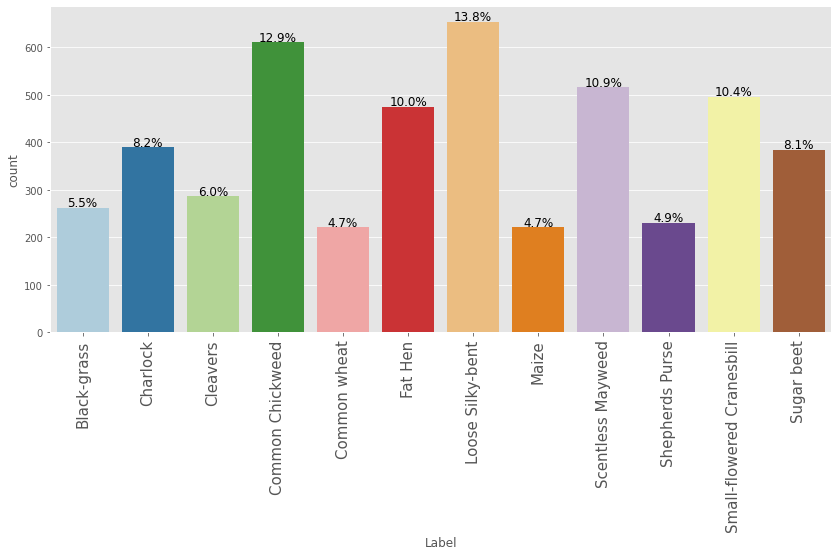

In [26]:
labeled_barplot(Label, "Label", perc=True)

* Chart for each class shows highest proportion of data for Loose Silky-bent followed by Common Chickweed.

### Mean images for each class

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4750 non-null   object
 1   images  4750 non-null   object
dtypes: object(2)
memory usage: 74.3+ KB


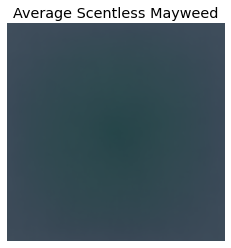

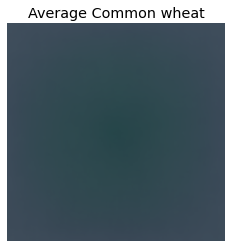

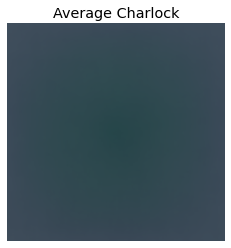

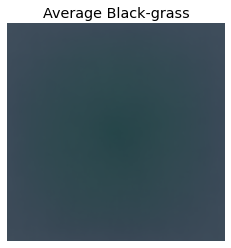

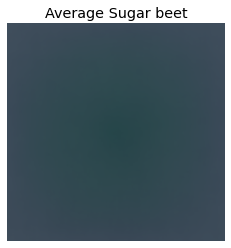

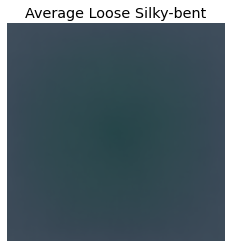

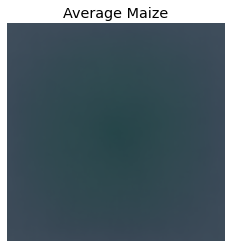

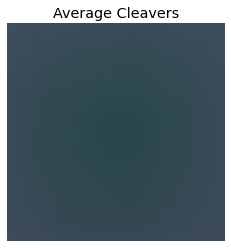

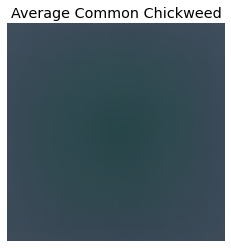

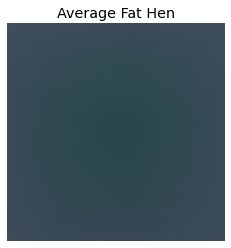

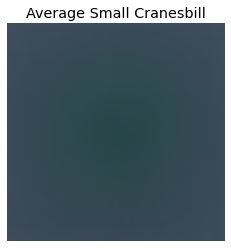

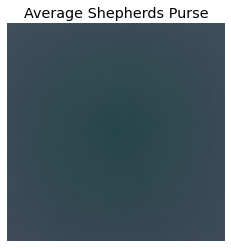

In [28]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128,-1))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

scentless_mayweed_data=[]
common_wheat_data=[]
charlock_data=[]
black_grass_data=[]
sugar_beet_data=[]
loose_silky_bent_data=[]
maize_data=[]
cleavers_data=[]
common_chickweed_data=[]
fat_hen_data=[]
small_flowered_cranesbill_data=[]
shepherds_purse_data=[]

for cat in CATEGORIES:
        for img in df['images']:
                #img = cv2.imread(img),cv2.IMREAD_GRAYSCALE) # Converting image to greyscale to reduce the complexity and computation 
                if cat==CATEGORIES[0]:
                      scentless_mayweed_data.append(img)
                if cat==CATEGORIES[1]:
                      common_wheat_data.append(img)
                if cat==CATEGORIES[2]:
                      charlock_data.append(img)
                if cat==CATEGORIES[3]:
                      black_grass_data.append(img)
                if cat==CATEGORIES[4]:
                      sugar_beet_data.append(img)
                if cat==CATEGORIES[5]:
                      loose_silky_bent_data.append(img)
                if cat==CATEGORIES[6]:
                      maize_data.append(img)
                if cat==CATEGORIES[7]:
                      cleavers_data.append(img)
                if cat==CATEGORIES[8]:
                      common_chickweed_data.append(img)
                if cat==CATEGORIES[9]:
                      fat_hen_data.append(img)
                if cat==CATEGORIES[10]:
                      small_flowered_cranesbill_data.append(img)
                if cat==CATEGORIES[11]:
                      shepherds_purse_data.append(img) 

sm_mean = find_mean_img(np.array(common_chickweed_data), 'Scentless Mayweed')
cw_mean = find_mean_img(np.array(common_chickweed_data), 'Common wheat')
c_mean = find_mean_img(np.array(common_chickweed_data), 'Charlock')
bg_mean = find_mean_img(np.array(common_chickweed_data), 'Black-grass')
sb_mean = find_mean_img(np.array(common_chickweed_data), 'Sugar beet')
ls_mean = find_mean_img(np.array(common_chickweed_data), 'Loose Silky-bent')
m_mean = find_mean_img(np.array(common_chickweed_data), 'Maize')
cl_mean = find_mean_img(np.array(common_chickweed_data), 'Cleavers')
cc_mean = find_mean_img(np.array(common_chickweed_data), 'Common Chickweed')
fh_mean = find_mean_img(np.array(common_chickweed_data), 'Fat Hen')
sfc_mean = find_mean_img(np.array(common_chickweed_data), 'Small Cranesbill')
sp_mean = find_mean_img(np.array(common_chickweed_data), 'Shepherds Purse')


## Insights based on EDA

* We have a dataset of 4750, 128x128 pixel colored images, from 12 species of plants.
* Data has highest proportion of data for Loose Silky-bent (~13.8%) followed by Common Chickweed (~12.9%)
* Data has lowest proportion of data for Maize and Common wheat (~4.7%).

  > Since the data is not balanced, it is posible that the model will be biased towards a few classes more than others. We will observe and adjust as needed.


* The images from plotting the mean of each class show that there is no specific pattern of the data. 
  > This can indicate that all the images appear to be uniform in terms of background, and target image shape and size.



         

# Data Preprocessing

**Now we will prepare data for model building.**

**Pre-processing steps**

* We already applied the normalization before EDA
* Next, we can remove unwanted noise from the images using Guassian Blurring
* Convert labels from digits to one hot vector
* Split into dependant and independant data
* Split to Train and Test sets

## Using Guassian Blurring

In [29]:
img=Data[1].reshape(128,128,3)
img

array([[[0.11764706, 0.18431373, 0.24705882],
        [0.11764706, 0.19607843, 0.23529412],
        [0.13333334, 0.18431373, 0.24705882],
        ...,
        [0.1882353 , 0.23137255, 0.2901961 ],
        [0.16470589, 0.21176471, 0.27058825],
        [0.17254902, 0.21960784, 0.27450982]],

       [[0.11764706, 0.19215687, 0.2627451 ],
        [0.10196079, 0.18431373, 0.23529412],
        [0.11764706, 0.15686275, 0.23921569],
        ...,
        [0.19607843, 0.2509804 , 0.29803923],
        [0.20392157, 0.2627451 , 0.30588236],
        [0.1764706 , 0.21960784, 0.28235295]],

       [[0.09019608, 0.18039216, 0.25490198],
        [0.10588235, 0.1882353 , 0.2509804 ],
        [0.09803922, 0.15686275, 0.23137255],
        ...,
        [0.15294118, 0.23137255, 0.31764707],
        [0.18431373, 0.24313726, 0.30980393],
        [0.16470589, 0.21176471, 0.27058825]],

       ...,

       [[0.1254902 , 0.21176471, 0.28235295],
        [0.22745098, 0.32156864, 0.37254903],
        [0.28235295, 0

Original Image:



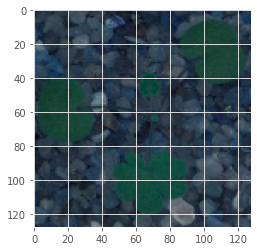

In [30]:
print('Original Image:\n')
plt.imshow(img)


 Output after first gaussian blurring: 



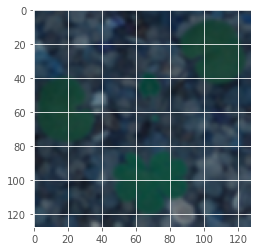

In [31]:
Gaussian1 = cv2.GaussianBlur(img, (5, 5), 0)
print('\n Output after first gaussian blurring: \n')
plt.imshow(Gaussian1)


 Output after second gaussian blurring: 



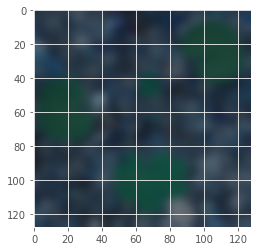

In [32]:
Gaussian2 = cv2.GaussianBlur(img, (15, 15), 0)
print('\n Output after second gaussian blurring: \n')
plt.imshow(Gaussian2)

## Label encode all the output classes

In [33]:
# Converting labels to numbers
encoder = LabelEncoder()
encoder.fit(y)
encoded_labels = encoder.transform(y)
categorical_labels = np_utils.to_categorical(encoded_labels)

In [34]:
encoder.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

### Splitting Train - Test data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,categorical_labels,test_size=0.2,random_state=7)

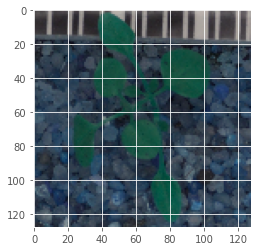

In [36]:
plt.imshow(x_train[0])

### Check model input data

In [37]:
print(y_train.shape)
print(y_test.shape)

(3800, 12)
(950, 12)


In [38]:
print(x_train.shape)
print(x_test.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)


# **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting a plant as weed, when it is not. 
* Predicting a plant as not weed, when it is. 

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. 

The goal today is to accurately differentiate a weed from crop, so that we can have a better yield and better stewardship of our environment. 

* A wrongly predicted weed will reduce our yield
* While a wrongly predicted plant will waste our resources.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives? and increase True Negatives and True Positives**

Since both errors are important for us to minimize, we would like the Accuracy and F1 Score evaluation metric to be maximized. Hence, the focus should be on increasing the Accuracy and F1 score rather than focusing on just one metric i.e. Recall or Precision.

## **Build Convolution Neural Networks**

#### **Aim is to create multiple CNN for model performance improvement**
* We will build several models using the tools available in CNN course like
  - Convolution Layers
  - Pooling Layers
  - Activation functions
  - Dropout
  - Batch Normalization
  - ANN Deep Layers
  - Using Image Data Generator to balance the data and then build models

### Initialize and build the model


In [39]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

## Model 1

In [40]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Add 1st Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(128, 128, 3), activation='relu'))

#Add 2nd Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

#Flatten the data
model.add(tf.keras.layers.Flatten())

#Add 1st dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Dropout
model.add(tf.keras.layers.Dropout(0.3))

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax'))

### Compile the model


In [41]:
# Create optimizer with default learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Summary

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 global_max_pooling2d (Globa  (None, 64)               0         
 lMaxPooling2D)                                                  
                                                        

### Fit the model

In [43]:
#Train the model
#Saving the best model using model checkpoint and early stopping callback
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(x_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=150, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training


Epoch 1/2
48/48 [==============================] - ETA: 0s - loss: 2.9250 - accuracy: 0.1000
Epoch 1: val_accuracy improved from -inf to 0.08289, saving model to best_model.h5
48/48 [==============================] - 19s 146ms/step - loss: 2.9250 - accuracy: 0.1000 - val_loss: 2.8871 - val_accuracy: 0.0829
Epoch 2/2
47/48 [============================>.] - ETA: 0s - loss: 2.4388 - accuracy: 0.1785
Epoch 2: val_accuracy improved from 0.08289 to 0.16842, saving model to best_model.h5
48/48 [==============================] - 5s 95ms/step - loss: 2.4366 - accuracy: 0.1789 - val_loss: 2.4247 - val_accuracy: 0.1684


### Plot the accuracy and loss graph for train and validation set

In [44]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

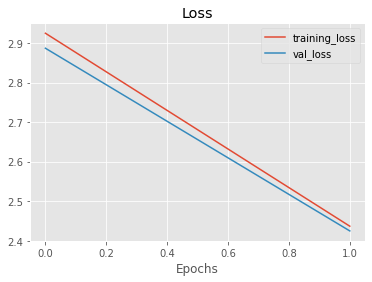

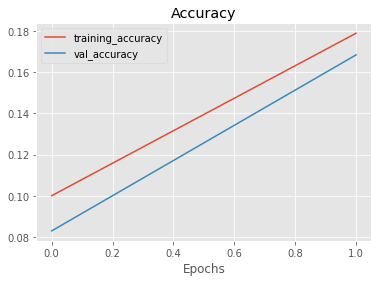

In [45]:
#Check our loss curves 
plot_loss_curves(history)

### Predict the accuracy for both train and validation data

In [46]:
#Final score and accuracy of the model
score, acc = model.evaluate(x_test,y_test)
score1, acc1 = model.evaluate(x_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

119/119 [==============================] - 2s 14ms/step - loss: 2.4586 - accuracy: 0.1721
Test score: 2.435938835144043    Test accuracy: 0.18736842274665833
Train score: 2.4586026668548584    Train accuracy: 0.17210526764392853


**Observation on Model 1**

* Model 1 was built with basic CNN run for 150 epochs, and has 49,356 parameters.
* Model 1 has a choppy test loss and accuracy scores.
* Our accuracy on test data landed at .60 which is good but we can improve the performance.
* Next, I will try adding more convolution and deep layers to improve the performance.


# Model Performance Improvement

## Model 2

In [47]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Add 1st Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(128, 128, 3), activation='relu'))

#Add 2nd Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add 3rd Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add 4th Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

#Flatten the data
model.add(tf.keras.layers.Flatten())

#Add 1st dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Dropout
model.add(tf.keras.layers.Dropout(0.3))

#Add 2nd dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Dropout
model.add(tf.keras.layers.Dropout(0.3))

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax'))

### Compile the Model

In [48]:
# Create optimizer with default learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Summary

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 128)      5

### Fit the model

In [50]:
#Train the model
#Saving the best model using model checkpoint and early stopping callback
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(x_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=150, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training


Epoch 1/2
48/48 [==============================] - ETA: 0s - loss: 2.5892 - accuracy: 0.2141
Epoch 1: val_accuracy improved from -inf to 0.09474, saving model to best_model.h5
48/48 [==============================] - 10s 171ms/step - loss: 2.5892 - accuracy: 0.2141 - val_loss: 5.2262 - val_accuracy: 0.0947
Epoch 2/2
48/48 [==============================] - ETA: 0s - loss: 1.6361 - accuracy: 0.4641
Epoch 2: val_accuracy improved from 0.09474 to 0.18421, saving model to best_model.h5
48/48 [==============================] - 7s 141ms/step - loss: 1.6361 - accuracy: 0.4641 - val_loss: 3.2256 - val_accuracy: 0.1842


### Plot the accuracy and loss graph for train and validation set

In [51]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

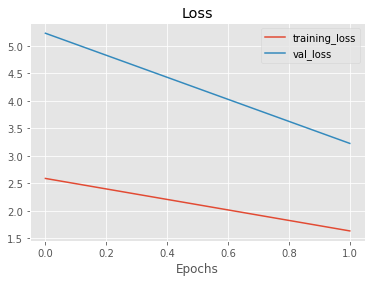

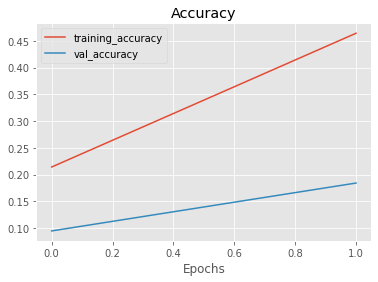

In [52]:
#Check our loss curves 
plot_loss_curves(history)

### Predict the accuracy for both train and validation data

In [53]:
#Final score and accuracy of the model
score, acc = model.evaluate(x_test,y_test)
score1, acc1 = model.evaluate(x_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

119/119 [==============================] - 2s 20ms/step - loss: 3.3985 - accuracy: 0.1705
Test score: 3.381331443786621    Test accuracy: 0.16421052813529968
Train score: 3.398458242416382    Train accuracy: 0.17052631080150604


**Observation on Model 2**

* Model 2 was built with increased layers both on convolution and artifical network side.
* It was run for 150 epochs, and had 461,516 parameters (Almost 10 times model 1)
* Model 2 also has a choppy test loss and accuracy scores too but it is better than Model 1. We could increase epochs and see if that helps.
* Also, our accuracy on test data landed at .81 which is pretty good.
* The Train accuracy is .91, so there is not terrible overfitting.
* Next, I will try adding using data generator to balance the data and see if that can improve the performance.


## Model 3

### Initialize the object of ImageDataGenerator

In [54]:
datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                         width_shift_range=0.2,
                                                         height_shift_range=0.2,
                                                         zoom_range=[0.4,1.5],
                                                         horizontal_flip=True,
                                                         vertical_flip=True)

datagen.fit(x_train)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)
(3800, 12)
(950, 12)


### Fit the Model

In [73]:
#Train the model
#Saving the best model using model checkpoint and early stopping callback
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_filepath = '/tmp/checkpoint'

mc = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128), 
                    epochs=150, validation_data=(x_test, y_test),   
                    callbacks = [es, mc],use_multiprocessing=True)

# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

Epoch 1/150
30/30 [==============================] - ETA: 0s - loss: 1.1197 - accuracy: 0.6139
Epoch 1: val_accuracy improved from -inf to 0.43158, saving model to /tmp/checkpoint
30/30 [==============================] - 20s 532ms/step - loss: 1.1197 - accuracy: 0.6139 - val_loss: 1.7213 - val_accuracy: 0.4316
Epoch 2/150
30/30 [==============================] - ETA: 0s - loss: 0.9726 - accuracy: 0.6674
Epoch 2: val_accuracy improved from 0.43158 to 0.47895, saving model to /tmp/checkpoint
30/30 [==============================] - 21s 673ms/step - loss: 0.9726 - accuracy: 0.6674 - val_loss: 1.4047 - val_accuracy: 0.4789
Epoch 3/150
30/30 [==============================] - ETA: 0s - loss: 0.8517 - accuracy: 0.7134
Epoch 3: val_accuracy did not improve from 0.47895
30/30 [==============================] - 18s 598ms/step - loss: 0.8517 - accuracy: 0.7134 - val_loss: 3.2602 - val_accuracy: 0.1600
Epoch 4/150
30/30 [==============================] - ETA: 0s - loss: 0.8293 - accuracy: 0.7161


### Plot the accuracy and loss graph for train and validation set

In [74]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

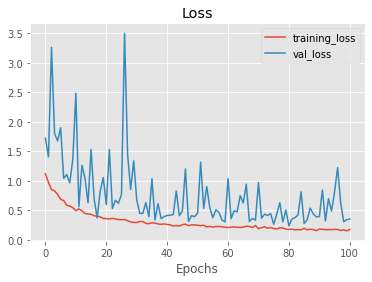

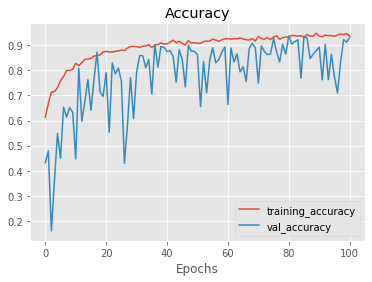

In [75]:
#Check our loss curves 
plot_loss_curves(history)

### Predict the accuracy for both train and validation data

In [76]:
#Final score and accuracy of the model
score, acc = model.evaluate(x_test,y_test)
score1, acc1 = model.evaluate(x_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

119/119 [==============================] - 2s 18ms/step - loss: 0.1355 - accuracy: 0.9466
Test score: 0.23574130237102509    Test accuracy: 0.9378947615623474
Train score: 0.1355017125606537    Train accuracy: 0.9465789198875427


**Observation on Model 3**

* Model 3 also has choppier test loss and accuracy scores. 
* But, the accuracy on test data has gone up to .937 which is very good and the train accuracy is at .946
  * So there is no overfitting in this model.
  * And it is the best metrics we have seen amongst all models.
* Next, I will decide on the best model to move forward.


## Best Model Selection

**Model 3 (Best) Observation**

As we see from the accuracy and loss chart above,

* The accuracy on test data has gone up to **.937** which is very good 
  * And it is the best metrics we have seen amongst all models.
* The train accuracy is at **.946**
  * So there is no overfitting in this model.

We will proceed with the **Model 3** to further check on the model performance
  * Since accuracy is not the best metrics for the goals of this case study, we will proceed to check precision and recall, as well as F1-score.

### Predict the classes for test data

In [77]:
y_pred = model.predict(x_test)
y_pred[1]

array([2.1467812e-09, 4.4430848e-08, 1.3130972e-07, 9.9926871e-01,
       1.2348312e-08, 5.4939544e-08, 7.0310944e-07, 1.6210667e-08,
       1.0703026e-06, 7.2845607e-04, 2.3656879e-09, 8.1084994e-07],
      dtype=float32)

In [78]:
y_pred_class = np.argmax(y_pred, axis=1)
pred_str = encoder.classes_[y_pred_class]
y_pred_class[1]

3

In [79]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return CATEGORIES[tf.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(y_pred[1])
pred_label

'Black-grass'

# Model Performance Evaluation

### Accuracy Score

In [80]:
y_test[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [81]:
y_pred_max=np.argmax(y_pred, axis=1)
y_test_max=np.argmax(y_test, axis=1)
accuracy_score(y_test_max, y_pred_max)

0.9378947368421052

**Observations**

* We obtained a very good **accuracy of ~93.8%**, but should run other metrics like precision and recall to check both false positives and negatives.

### Confusion Matrix

In [82]:
cm = confusion_matrix(y_test_max, y_pred_max)
print(cm)

[[ 25   0   0   0   0   0  33   1   0   0   0   0]
 [  0  69   3   0   0   0   0   0   0   1   0   1]
 [  0   0  52   0   0   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   1   0   1   0   0   0]
 [  1   0   1   0  38   0   1   1   0   0   0   2]
 [  0   0   0   0   0  92   1   0   0   0   1   1]
 [  0   0   0   0   0   0 124   0   0   0   0   0]
 [  0   0   0   1   0   0   0  45   0   0   0   1]
 [  0   0   0   1   0   0   1   0 122   0   0   0]
 [  0   0   0   0   0   0   0   0   1  42   0   0]
 [  0   0   0   0   0   0   0   0   0   2  93   0]
 [  0   0   0   0   1   0   1   0   0   0   0  74]]


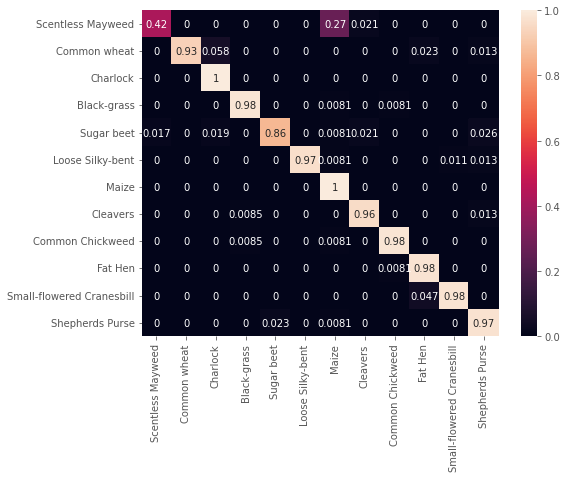

In [83]:
# Confusion matrix normalized per category true value
cm_n1 = cm/np.sum(cm, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cm_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**Observations**

* The confusion matrix is pretty clean, with very few incorrect predictions.
  * Plants like **Charlock and Maize** were predicted with 100% accuracy.
* The Scentless Mayweed was predicted with 42% accuracy and mostly it was predicted as Maize (~27%)
  * Either there is huge similarity in these seedlings.
  * or it could be related to the imbalance in the data as well.  

**Takeaway**

* One would be to get better quality and quantity of images for **Scentless Mayweed** to avoid this error. 
* We should run other metrics like precision and recall to check both false positives and negatives.


### Performance Metrics

In [84]:
p=precision_recall_fscore_support(y_test_max, y_pred_max, average=None,labels=list(np.unique(y_test)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))


 Precision is [0.96153846 1.        ]
 Recall is [0.42372881 0.93243243] 
 f_beta Score is [0.58823529 0.96503497]


### Weighted F-Score

In [85]:
f1_score(y_test_max, y_test_max, average='weighted')

1.0

Observations

* **F1-score of 96%** is very good for the CNN we built today. 
* Lets make some predictions with it and explore further.

# Conclusion and Key Takeaways

## Key Insights

### Insights based on EDA

* We have a dataset of `4750, 128x128 pixel colored images`, from `12 species` of plants.
* Data has highest proportion of data for **Loose Silky-bent (13.8%)** followed by Common Chickweed (12.9%)
* Data has lowest proportion of data for **Maize and Common wheat (4.7%).**

* Since the data is **not balanced**, it is posible that the model will be biased towards a few classes more than others. We will observe and adjust as needed.

* The images from plotting the **mean of each class** show that there is no specific pattern of the data.
  * This can indicate that all the **images appear to be uniform** in terms of background, and target image shape and size.




### Key Business Objectives

* The goal today is to help differentiate a weed from crop, 
  * so that we can have a better yield and 
  * better stewardship of our environment. 
  
  In order to do that, we build convolutional neural network classifier capable of determining a plant's species from a photo with a high level of accuracy.

## Conclusion

We have completed an end-to-end CNN on a `multi-class image classification problem`.

* Based on insights obtained from EDA and considering the objectives for the study, we create `convolution neural network` to solve this problem.
* We agreed on our main problem i.e.,
  * A wrongly predicted weed will reduce our yield
  * While a wrongly predicted plant will waste our resources.

* So, to reduce both these losses i.e need to reduce False Negatives as well as False Positives 

  * Hence, the focus should be on `increasing the Accuracy and F1 score` rather than focusing on just one metric i.e. Recall or Precision.


* **Model 1** was built with basic CNN run for 150 epochs, and had 49,356 parameters.
  * It had **accuracy scores of 60%** which was good but we wanted to improve it further.
  * Next, Model 2 was built with increased convolution, pooling and deep layers, normalization and dropouts.

* **Model 2** was run for 150 epochs, and had 461,516 parameters (Almost 10 times model 1)and it gave a **test accuracy of 81%** which is a significant improvement.
  * Next, we used image data generator with Model 2 to give another set of improvements.

**Final Best Model 3**

* gave a whooping **test accuracy of 93.8%** 
* and **F1-score of 96%** 
* with **no significant overfitting**


**Suggestions/Next Steps**

* Although we have seen a very good model, but our model could benefit from using other approaches like,

  1. *Data augmentation* - Take the training images and manipulate (crop, resize) or distort them (flip, rotate) to create even more training data for the model to learn from. Check out the TensorFlow images documentation for a whole bunch of functions you can use on images. 

  1. *Fine-tuning* - The model we used in this notebook was created by some trial and error. One option is to use what the model already knows and fine-tune this knowledge to our own dataset to get a even better model. 

  1. *Trained model* - Another approach can be to use a trained model directly from TensorFlow Hub, for example from another dataset (ImageNet, etc) and apply it to our own. With that trained model as the baseline, we can continue more improvements.

#Thank You

